In [8]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
gapminder = px.data.gapminder()

In [19]:
last_year = gapminder['year'].max()

df = (
    gapminder    
    .query('year == @last_year')
    .pivot_table(index='continent', aggfunc={'lifeExp': 'mean'})
    .round(1)
    .sort_values('lifeExp', ascending=False)
    .reset_index()
)


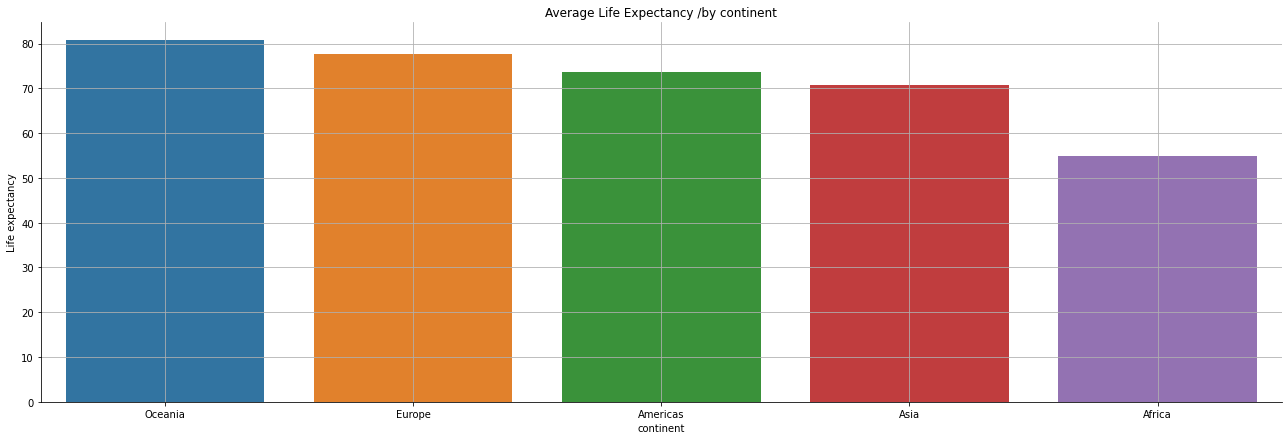

In [20]:
ax = sns.catplot(y="lifeExp", x="continent", kind="bar", data=df, height=6, aspect=3)
plt.title("Average Life Expectancy /by continent")
plt.ylabel("Life expectancy")
plt.grid(True)

In [8]:
df_slovak = (
    gapminder     
    .query('country == "Slovak Republic"')
    .sort_values('year')
)

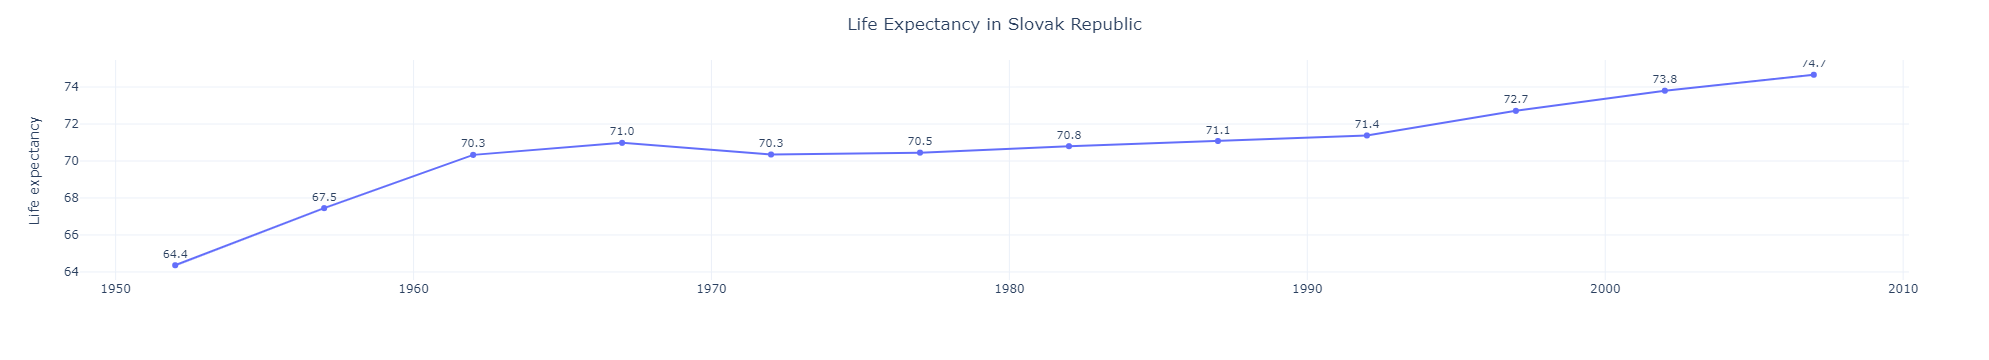

In [9]:
fig = (
    px.line(df_slovak, x='year', y='lifeExp', text='lifeExp') 
    .update_layout(
        title='Life Expectancy in Slovak Republic',
        title_x=0.5,
        xaxis_title='',
        yaxis_title='Life expectancy',
        template = 'plotly_white'
    )
    .update_traces(
        mode='markers+lines+text',
        textposition='top center',
        textfont_size=11,
        texttemplate='%{text:.1f}'
    ) 
)
    
fig.show()

In [10]:
df_2 = (
    gapminder
    .query('continent == "Oceania"')
    .sort_values(['country', 'year'])
    .drop_duplicates('country', keep='last')
)

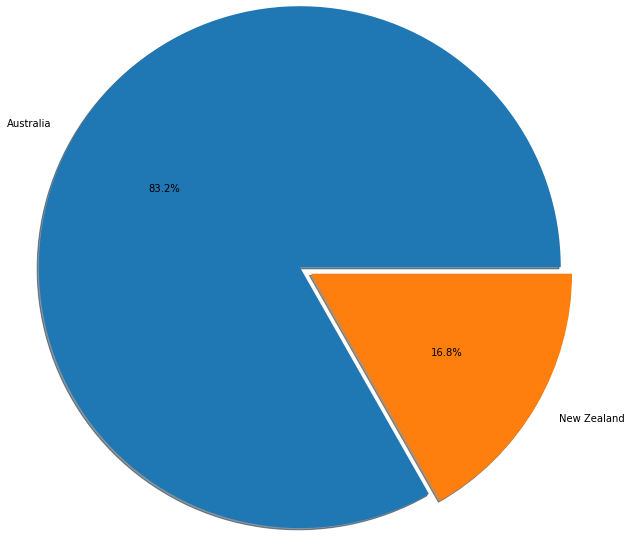

In [22]:
plt.pie(df_2['pop'],labels = df_2['country'],autopct='%1.1f%%',explode = (0.05,0.1),radius=3,shadow=True)

plt.show()

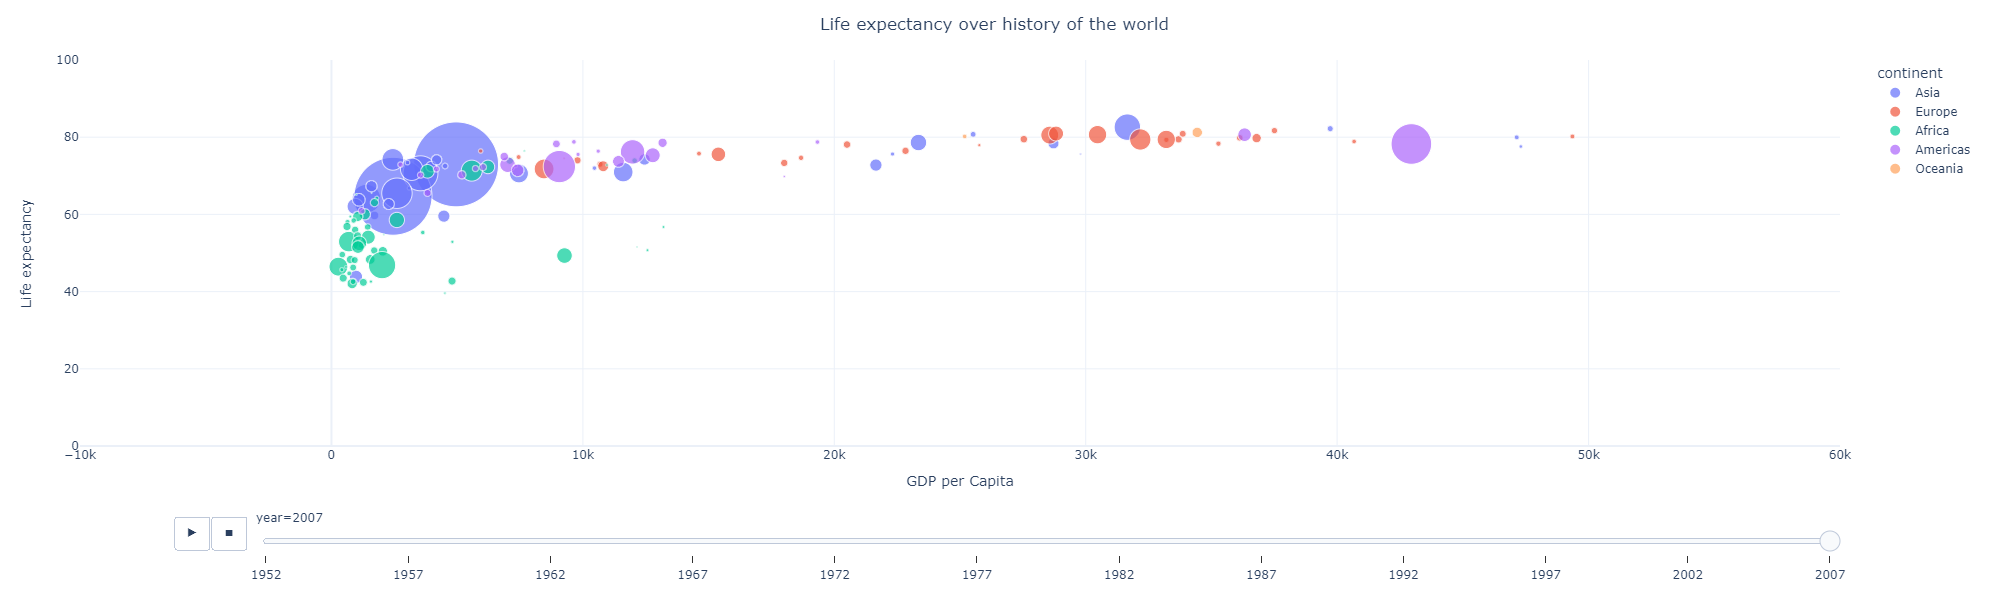

In [57]:
fig = (
    px.scatter(gapminder, x="gdpPercap", y="lifeExp", color='continent', size='pop', size_max=60, hover_name="country", 
               animation_frame="year", animation_group="country",
               range_x=[-10000, 60000], range_y=[0, 100])    
    .update_layout(
        title='Life expectancy over history of the world',
        title_x=0.5,
        xaxis_title='GDP per Capita',
        yaxis_title='Life expectancy',
        template = 'plotly_white',
        height=600
    )
)

fig.show()